# Importing Libraries

In [2]:
import os

import cv2

import shutil

import numpy as np

import pandas as pd

from glob import glob

import matplotlib.pyplot as plt

import xml.etree.ElementTree as xet

from sklearn.model_selection import train_test_split



import torch

# Checking if cuda is available

print(f'{torch.cuda.is_available() = }') #cuda is helping us in telling that GP is avaialable or not

print(f'{torch.cuda.device_count() = }')

torch.cuda.is_available() = True
torch.cuda.device_count() = 2


In [3]:
#YOLO was introduced by ultralytics so installing it to import YOLO

!pip install --upgrade ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.9 MB/s eta 0:00:00a 0:00:01


In [4]:
# it's a package which will give the widgets itself while we r doing the model training for visualization

!pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 3.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 kB 5.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 37.5 MB/s eta 0:00:0000:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.9
    Uninstalling widgetsnbextension-3.6.9:
      Successfully uninstalled widgetsnbextension-3.6.9
  Attempting uninstall: jupyterlab_widgets
    Found existing installation: jupyterlab_widgets 3.0.11
    Uninstalling jupyterlab_widgets-3.0.11:
      Successfully uninstalled jupyterlab_widgets-3.0.11
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflict

In [5]:
dataset_path = '/kaggle/input/car-plate-detection'

Now we are writing a function which will extract the numbers given in the string present in annotation files inside dataset file.



For example, filename123.txt --> 123






In [6]:
import re



def the_number_in_the_string(filename):

    """

    Extracts the first sequence of digits from the given filename string and returns it as an integer.

    If no digits are found, returns 0.



    Parameters:

    filename (str): The input string to search for digits.



    Returns:

    int: The first sequence of digits found in the input string, or 0 if no digits are found.

    """



    # Search for the first occurrence of one or more digits in the filename

    match = re.search(r'(\d+)', filename)





    if match:

        return int(match.group(0))

    else:

        return 0

In [7]:
print(the_number_in_the_string('file123.txt'))

123


# Formatting the XML file and creating DF

Now, we have xml files, we have to read them, modifications krne pdenge, we want to convert them into text format as well so for that we are creating a function below

In [8]:
labels_dict = dict(img_path = [],

                   xmin = [],

                   xmax = [],

                   ymin = [],

                   ymax = [],

                   img_width = [],

                   img_height = []

)

In [9]:
# we got the file name path by using glob

import os

from glob import glob



# Get the list of XML files from the annotations directory

xml_files = glob(f'{dataset_path}/annotations/*.xml')

In [10]:
# it is used for performing operations on xml files

import xml.etree.ElementTree as xet

In [11]:
import cv2

for filename in sorted(xml_files, key = the_number_in_the_string): # here key is used to give in which manner the files will be sorted

    # print(filename) # now the file is stored here in sorted format

    info = xet.parse(filename) # Parsing the XML file

    root = info.getroot()

    # print(info) # now the xml file is parsed and stored as object

    # print(root) # root contains the annotation file text



    # Now we can fetch text from the 'annotation' file stored in car dataset folder



    # now we have to find the object and bndbox tag stored in annotation file

    member_object = root.find('object')

    labels_info = member_object.find('bndbox')

    # print(member_object, labels_info)



    # Now we want to extract the variables like xmin, ymin, xmax, ymax or Find the 'object' element in the XML and extract bounding box information

    xmin = int(labels_info.find('xmin').text)

    xmax = int(labels_info.find('xmax').text)

    ymin = int(labels_info.find('ymin').text)

    ymax = int(labels_info.find('ymax').text)



    # putting all the values in the dataframe or Get the image filename and construct the full path to the image

    img_name = root.find('filename').text

    img_path = os.path.join(dataset_path, 'images', img_name)

    # print(img_name, img_path)



    # Read the image to get its dimensions

    height, width, _ = cv2.imread(img_path).shape #here we will be having RGB(3rd) values hence to be stored in 3 values

    # print(height, width)



    labels_dict['img_path'].append(img_path)

    labels_dict['xmin'].append(xmin)

    labels_dict['xmax'].append(xmax)

    labels_dict['ymin'].append(ymin)

    labels_dict['ymax'].append(ymax)

    labels_dict['img_width'].append(width)

    labels_dict['img_height'].append(height)



    # print(labels_dict)



    # break # helping us in getting one value, not running on all over dataset

Storing all the data in form of DataFrame or Convert the dictionary to a pandas DataFrame

In [12]:
alldata = pd.DataFrame(labels_dict)

alldata

,img_path,xmin,xmax,ymin,ymax,img_width,img_height
0,/kaggle/input/car-plate-detection/images/Cars0...,226,419,125,173,500,268
1,/kaggle/input/car-plate-detection/images/Cars1...,134,262,128,160,400,248
2,/kaggle/input/car-plate-detection/images/Cars2...,229,270,176,193,400,400
3,/kaggle/input/car-plate-detection/images/Cars3...,142,261,128,157,400,225
4,/kaggle/input/car-plate-detection/images/Cars4...,156,503,82,253,590,350
...,...,...,...,...,...,...,...
428,/kaggle/input/car-plate-detection/images/Cars4...,142,258,128,157,400,225
429,/kaggle/input/car-plate-detection/images/Cars4...,86,208,166,195,301,400
430,/kaggle/input/car-plate-detection/images/Cars4...,38,116,159,197,400,225
431,/kaggle/input/car-plate-detection/images/Cars4...,55,343,82,147,400,192


# Train test splitting

In [13]:
from sklearn.model_selection import train_test_split



# train, val and test splitting



# Split the data into training and test sets

# Use 10% of the data for the test set

train, test = train_test_split(alldata, test_size = 1/10, random_state = 42)



# Split the training data further into training and validation sets

# Use 8/9 of the remaining data for the training set, resulting in an 80/10/10 split overall

train, val = train_test_split(train, train_size = 8/9, random_state = 42)



# Print the number of samples in each set

print(f'''

    len(train) = {len(train)}

    len(val) = {len(val)}

    len(test) = {len(test)}

''')






    len(train) = 345

    len(val) = 44

    len(test) = 44




In [14]:
# Remove the 'datasets' directory if it exists

if os.path.exists('datasets'):

    shutil.rmtree('datasets')

In [15]:
train

,img_path,xmin,xmax,ymin,ymax,img_width,img_height
124,/kaggle/input/car-plate-detection/images/Cars1...,305,320,256,267,400,267
315,/kaggle/input/car-plate-detection/images/Cars3...,12,385,98,181,400,300
282,/kaggle/input/car-plate-detection/images/Cars2...,37,319,145,203,350,263
236,/kaggle/input/car-plate-detection/images/Cars2...,223,250,106,119,400,176
112,/kaggle/input/car-plate-detection/images/Cars1...,49,164,135,191,240,400
...,...,...,...,...,...,...,...
110,/kaggle/input/car-plate-detection/images/Cars1...,286,328,133,159,400,267
255,/kaggle/input/car-plate-detection/images/Cars2...,116,273,156,188,400,267
292,/kaggle/input/car-plate-detection/images/Cars2...,91,137,187,208,400,267
54,/kaggle/input/car-plate-detection/images/Cars5...,148,257,61,118,400,300


Now we want to change variables like xmin, ymin, xmax, ymax, img_width, img_height for YOLO and convert the data into text file




In [16]:
def make_split_folder_in_yolo_format(split_name, split_df):

    """

    Creates a folder structure for a dataset split (train/val/test) in YOLO format.

    Parameters:

    split_name (str): The name of the split (e.g., 'train', 'val', 'test').

    split_df (pd.DataFrame): The DataFrame containing the data for the split.

    The function will create 'labels' and 'images' subdirectories under 'datasets/cars_license_plate/{split_name}',

    and save the corresponding labels and images in YOLO format.

    """

    labels_path = os.path.join('datasets', 'cars_license_plate_new', split_name, 'labels')

    images_path = os.path.join('datasets', 'cars_license_plate_new', split_name, 'images')



    # creating directories

    os.makedirs(labels_path, exist_ok = True)

    os.makedirs(images_path, exist_ok = True)



    # now we are converting these variable values into YOLO format

    for _, row in split_df.iterrows():

        # we are getting the car name and its extension

        img_name, img_extension = os.path.splitext(os.path.basename(row['img_path']))



        # Calculate YOLO format bounding box coordinates

        x_center = (row['xmin'] + row['xmax'])/2/row['img_width'] # /row_width is done to normalize the value that we have learnt earlier

        y_center = (row['ymin'] + row['ymax'])/2/row['img_height']

        width = (row['xmax'] - row['xmin'])/row['img_width']

        height = (row['ymax'] - row['ymin'])/row['img_height']



        # saving these values in text format

        label_path = os.path.join(labels_path, f'{img_name}.txt') # img_name is name of the text file

        with open(label_path, 'w') as file:

            file.write(f"0 {x_center:.4f} {y_center:.4f} {width:.4f} {height:.4f}\n") # writing all the variables


        # Copy the image to the images directory
        shutil.copy(row['img_path'], os.path.join(images_path, img_name + img_extension))



    print(f"Created '{images_path}' and '{labels_path}'")


In [17]:
# Calling the above function for training dataset
# Create YOLO format folders for train, validation, and test splits
make_split_folder_in_yolo_format("train", train)

make_split_folder_in_yolo_format("val", val)

make_split_folder_in_yolo_format("test", test)


Created 'datasets/cars_license_plate_new/train/images' and 'datasets/cars_license_plate_new/train/labels'
Created 'datasets/cars_license_plate_new/val/images' and 'datasets/cars_license_plate_new/val/labels'
Created 'datasets/cars_license_plate_new/test/images' and 'datasets/cars_license_plate_new/test/labels'


#Creating a YAML file


In [18]:
# yaml file will define the structure, we want to let know the model that this structure contains our model



# Define the content of the datasets.yaml file

datasets_yaml = '''

path: cars_license_plate_new



train: train/images

val: val/images

test: test/images



# number of classes

nc: 1

# class names

names: ['license_plate']

'''



# Write the content to the datasets.yaml file

with open('datasets.yaml', 'w') as file:

    file.write(datasets_yaml)




In [19]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 75.0MB/s]


In [20]:
model.train(

    data='datasets.yaml',  # Path to the dataset configuration file

    epochs=15,            # Number of training epochs

    batch=16,              # Batch size

    device='cuda',         # Use GPU for training

    imgsz=320,             # Image size (width and height) for training

    cache=True             # Cache images for faster training

)

Ultralytics 8.3.158 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=15, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=320, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, pro

100%|██████████| 755k/755k [00:00<00:00, 16.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 72.9MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2431.2±1858.9 MB/s, size: 607.4 KB)


train: Scanning /kaggle/working/datasets/cars_license_plate_new/train/labels... 345 images, 0 backgrounds, 0 corrupt: 100%|██████████| 345/345 [00:00<00:00, 383.67it/s]

train: New cache created: /kaggle/working/datasets/cars_license_plate_new/train/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (0.1GB RAM): 100%|██████████| 345/345 [00:02<00:00, 162.34it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2267.5±1250.2 MB/s, size: 402.1 KB)


val: Scanning /kaggle/working/datasets/cars_license_plate_new/val/labels... 44 images, 0 backgrounds, 0 corrupt: 100%|██████████| 44/44 [00:00<00:00, 244.92it/s]

val: New cache created: /kaggle/working/datasets/cars_license_plate_new/val/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.0GB RAM): 100%|██████████| 44/44 [00:00<00:00, 163.37it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 15 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/15     0.592G      1.757      2.945      1.308         19        320: 100%|██████████| 22/22 [00:04<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.05s/it]

                   all         44         44    0.00369      0.909      0.162     0.0781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/15     0.615G      1.547      1.589      1.162         14        320: 100%|██████████| 22/22 [00:02<00:00, 10.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.99it/s]

                   all         44         44    0.00505      0.932      0.188      0.096



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/15     0.625G      1.569      1.455      1.186         19        320: 100%|██████████| 22/22 [00:02<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.68it/s]

                   all         44         44      0.566     0.0909      0.383      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/15     0.625G      1.494      1.321      1.195         15        320: 100%|██████████| 22/22 [00:01<00:00, 11.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.17it/s]


                   all         44         44      0.164      0.318      0.145     0.0618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/15     0.625G      1.496      1.296      1.157         17        320: 100%|██████████| 22/22 [00:01<00:00, 11.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.46it/s]

                   all         44         44      0.665      0.542      0.601      0.298


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/15     0.625G      1.496      1.369      1.215          9        320: 100%|██████████| 22/22 [00:02<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.84it/s]

                   all         44         44       0.69      0.658      0.722      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/15     0.625G      1.491      1.324      1.207          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.01it/s]

                   all         44         44      0.597      0.682       0.71      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/15     0.625G      1.405      1.227      1.184          9        320: 100%|██████████| 22/22 [00:02<00:00, 10.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.70it/s]

                   all         44         44      0.837      0.773      0.844      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/15     0.625G      1.395      1.136      1.166          9        320: 100%|██████████| 22/22 [00:02<00:00,  9.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.70it/s]

                   all         44         44      0.898      0.864      0.907       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/15     0.625G      1.403      1.065      1.167          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.35it/s]

                   all         44         44      0.919      0.864      0.912      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/15     0.625G       1.35      1.068      1.142          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.63it/s]

                   all         44         44      0.821      0.832      0.866      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/15     0.625G      1.363      1.009      1.144          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.88it/s]

                   all         44         44      0.915      0.795      0.861      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/15     0.625G       1.24     0.9499       1.09          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.50it/s]

                   all         44         44      0.948      0.836      0.899      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/15     0.625G      1.252     0.9269      1.107          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.21it/s]

                   all         44         44      0.935      0.841       0.88       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/15     0.625G      1.238     0.8853      1.101          9        320: 100%|██████████| 22/22 [00:01<00:00, 11.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.22it/s]

                   all         44         44      0.925      0.838       0.89      0.501



15 epochs completed in 0.012 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.158 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.22it/s]


                   all         44         44      0.934      0.841      0.881       0.51
Speed: 0.1ms preprocess, 0.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e60bd977820>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

# Predicting the images


In [21]:
# Finding the most recent training log directory
log_dir = max(glob('runs/detect/train*'), key = the_number_in_the_string)

# Load the training results from the CSV file
results = pd.read_csv(os.path.join(log_dir, 'results.csv'))
results

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,6.85132,1.75721,2.94524,1.30812,0.00369,0.90909,0.16249,0.07814,1.53938,2.97871,1.14517,0.000420,0.000420,0.000420
1,2,9.39506,1.54688,1.58895,1.16215,0.00505,0.93182,0.18758,0.09599,1.65143,3.21796,1.26112,0.000803,0.000803,0.000803
2,3,11.93860,1.56886,1.45527,1.18599,0.56596,0.09091,0.38299,0.17316,1.67547,2.55833,1.31148,0.001128,0.001128,0.001128
3,4,14.42850,1.49409,1.32114,1.19455,0.16417,0.31818,0.14471,0.06175,1.91283,2.49674,1.43556,0.001395,0.001395,0.001395
4,5,16.79950,1.49649,1.29600,1.15722,0.66523,0.54202,0.60098,0.29757,1.73290,1.85941,1.27767,0.001472,0.001472,0.001472
5,6,19.82190,1.49625,1.36927,1.21454,0.68998,0.65758,0.72231,0.35475,1.72414,1.66978,1.31116,0.001340,0.001340,0.001340
6,7,22.29770,1.49087,1.32417,1.20683,0.59688,0.68182,0.70969,0.36092,1.69429,1.42213,1.29874,0.001208,0.001208,0.001208
7,8,24.88170,1.40468,1.22680,1.18354,0.83664,0.77273,0.84436,0.40574,1.66242,1.28386,1.32322,0.001076,0.001076,0.001076
8,9,27.62990,1.39490,1.13622,1.16645,0.89790,0.86364,0.90668,0.46034,1.62084,1.11419,1.29006,0.000944,0.000944,0.000944
9,10,30.00320,1.40323,1.06542,1.16744,0.91887,0.86364,0.91156,0.48072,1.62956,0.98698,1.28924,0.000812,0.000812,0.000812


In [22]:
# Remove any leading/trailing whitespace from column names
results.columns = results.columns.str.strip()

# Extract epochs and accuracy metrics
epochs = results.index + 1
print(epochs)

RangeIndex(start=1, stop=16, step=1)


In [23]:
results.columns

Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')

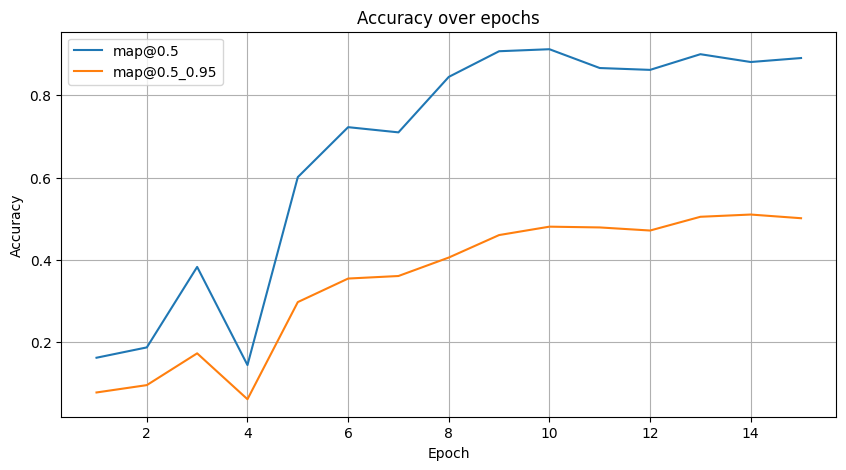

In [24]:
# Mean Average Precision at IoU=0.5
map_0_5 = results['metrics/mAP50(B)']
# Mean Average Precision at IoU=0.5:0.95
map_0_5_0_95 = results['metrics/mAP50-95(B)']

# Plot the accuracy over epochs
plt.figure(figsize = (10,5))
plt.plot(epochs, map_0_5, label = 'map@0.5')
plt.plot(epochs, map_0_5_0_95, label = 'map@0.5_0.95')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over epochs')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# Saving model
model.save("License_plate_model.pt")
# we have already a pt file saved in /kaggle/working/runs/detect/train/weights/best.pt and we can also save the file separately as we are doing now

In [26]:
# Finding prediction
results = model.predict('/kaggle/working/datasets/cars_license_plate_new/train/images/Cars107.png')


image 1/1 /kaggle/working/datasets/cars_license_plate_new/train/images/Cars107.png: 192x320 1 license_plate, 37.0ms
Speed: 0.8ms preprocess, 37.0ms inference, 2.2ms postprocess per image at shape (1, 3, 192, 320)


In [27]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'license_plate'}
 obb: None
 orig_img: array([[[ 94, 114, 132],
         [ 87, 107, 125],
         [ 70,  90, 108],
         ...,
         [139, 156, 172],
         [135, 152, 168],
         [138, 155, 171]],
 
        [[ 79,  99, 117],
         [ 90, 110, 128],
         [ 90, 110, 128],
         ...,
         [118, 135, 151],
         [116, 133, 149],
         [117, 134, 150]],
 
        [[ 90, 110, 128],
         [ 96, 116, 134],
         [ 91, 111, 129],
         ...,
         [117, 134, 150],
         [117, 134, 150],
         [117, 134, 150]],
 
        ...,
 
        [[100, 115, 124],
         [100, 115, 124],
         [ 99, 114, 123],
         ...,
         [ 71,  80,  90],
         [ 74,  83,  93],
         [ 71,  80,  90]],
 
        [[102, 117, 126],
         [101, 116, 125],
         [ 99, 114, 123],
         ...,
         [ 

In [28]:
# Converting image into black and white
image = cv2.imread('/kaggle/working/datasets/cars_license_plate_new/train/images/Cars184.png')
results = model.predict('/kaggle/working/datasets/cars_license_plate_new/train/images/Cars184.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


image 1/1 /kaggle/working/datasets/cars_license_plate_new/train/images/Cars184.png: 192x320 1 license_plate, 7.5ms
Speed: 0.9ms preprocess, 7.5ms inference, 1.6ms postprocess per image at shape (1, 3, 192, 320)


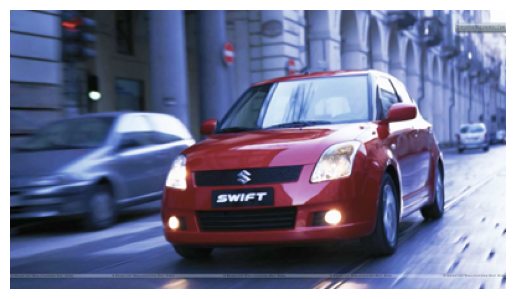

In [29]:
#for result in results:
    #for box in result.boxes:
        #print(box)
        #x1, y1, x2, y2 = map(int, box.xyxy[0])
        #confidence = box.conf[0]

        #cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        #cv2.putText(image, f'{confidence*100:.2f}%', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
plt.imshow(image)
plt.axis('off')
plt.show()


# Prediction task completed
Prediction is completed using YOLO v8

Now we can to convert the number plate into text format as well using package called pytesseract OCR internally, not going too much internally

In [30]:
 !pip install pytesseract

In [31]:
import pytesseract
from pytesseract import Output

In [32]:
parked_vehicles= []


image 1/1 /kaggle/working/datasets/cars_license_plate_new/train/images/Cars100.png: 224x320 (no detections), 44.4ms
Speed: 1.4ms preprocess, 44.4ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 320)


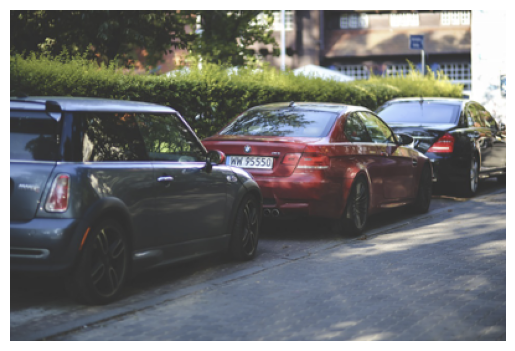

In [33]:
image = cv2.imread('/kaggle/working/datasets/cars_license_plate_new/train/images/Cars100.png')
results = model.predict('/kaggle/working/datasets/cars_license_plate_new/train/images/Cars100.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
detected_plates = []
for result in results:
    for box in result.boxes:
        #print(box)
        #x1, y1, x2, y2 = map(int, box.xyxy[0])
        #confidence = box.conf[0]

        #cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        #cv2.putText(image, f'{confidence*100:.2f}%', (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        # now we want to extract the region of interest or cropping the image using the coordinates value
        roi = image[y1:y2, x1:x2]

        text = pytesseract.image_to_string(roi, config = '--psm 6') #here config is model config
        print(f"Detected License Plate Number: {text}")
        detected_plates.append(text)

# Step 5: Create a DataFrame
parked_vehicles = pd.DataFrame(detected_plates, columns=['License Plate Number'])

plt.imshow(image)
plt.axis('off')
plt.show()


image 1/1 /kaggle/working/datasets/cars_license_plate_new/train/images/Cars60.png: 256x320 1 license_plate, 41.7ms
Speed: 1.0ms preprocess, 41.7ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 320)
Detected License Plate Number from Cars60.png: | OS® 802-HN}


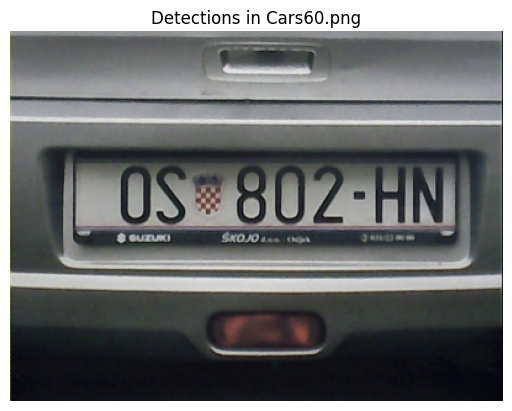


image 1/1 /kaggle/working/datasets/cars_license_plate_new/train/images/Cars80.png: 256x320 1 license_plate, 7.8ms
Speed: 1.0ms preprocess, 7.8ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 320)
Detected License Plate Number from Cars80.png: MBAD:2:31|


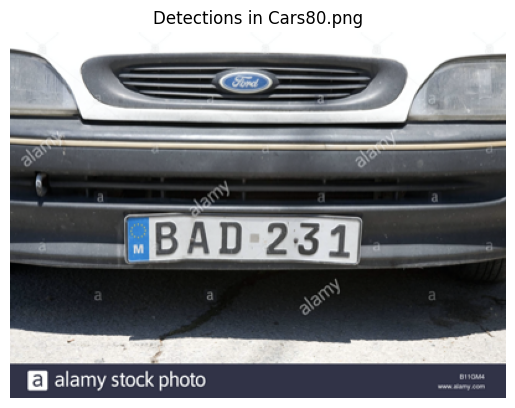


image 1/1 /kaggle/working/datasets/cars_license_plate_new/train/images/Cars100.png: 224x320 (no detections), 8.1ms
Speed: 0.9ms preprocess, 8.1ms inference, 0.8ms postprocess per image at shape (1, 3, 224, 320)


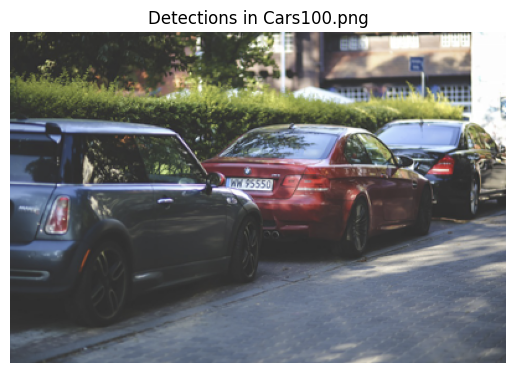


image 1/1 /kaggle/working/datasets/cars_license_plate_new/train/images/Cars118.png: 224x320 1 license_plate, 7.3ms
Speed: 1.0ms preprocess, 7.3ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 320)
Detected License Plate Number from Cars118.png: JAG2 UAR


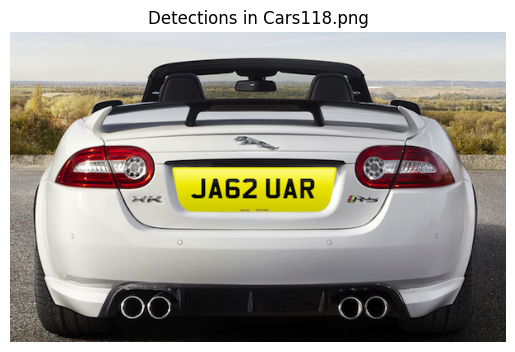


image 1/1 /kaggle/working/datasets/cars_license_plate_new/train/images/Cars11.png: 256x320 1 license_plate, 7.8ms
Speed: 1.0ms preprocess, 7.8ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 320)
Detected License Plate Number from Cars11.png: WOR SIGK


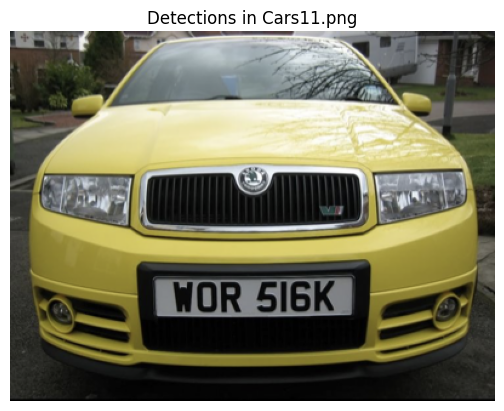


image 1/1 /kaggle/working/datasets/cars_license_plate_new/train/images/Cars113.png: 256x320 1 license_plate, 7.8ms
Speed: 0.9ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 256, 320)
Detected License Plate Number from Cars113.png: WPEACHN


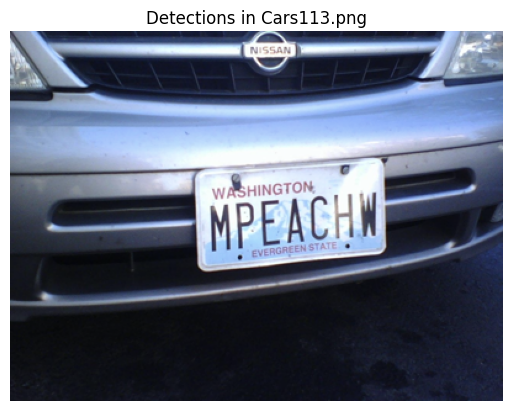


image 1/1 /kaggle/working/datasets/cars_license_plate_new/train/images/Cars120.png: 224x320 1 license_plate, 8.0ms
Speed: 0.9ms preprocess, 8.0ms inference, 1.5ms postprocess per image at shape (1, 3, 224, 320)
Detected License Plate Number from Cars120.png: HB 2228HM)


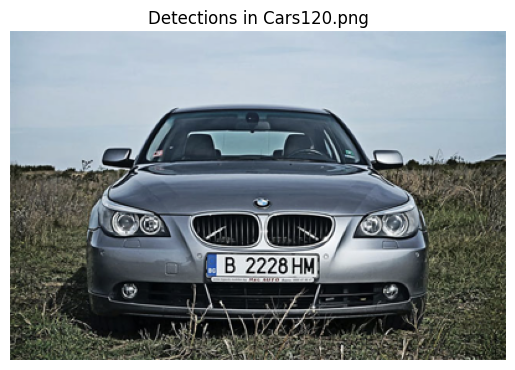


image 1/1 /kaggle/working/datasets/cars_license_plate_new/train/images/Cars111.png: 192x320 1 license_plate, 8.2ms
Speed: 0.9ms preprocess, 8.2ms inference, 1.6ms postprocess per image at shape (1, 3, 192, 320)
Detected License Plate Number from Cars111.png: MH 20EE 7598 |


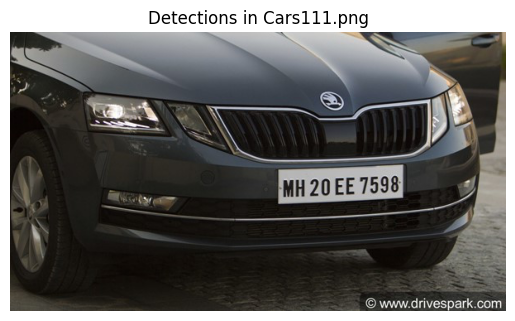

    Image Name License Plate Number
0   Cars60.png        | OS® 802-HN}
1   Cars80.png           MBAD:2:31|
2  Cars118.png             JAG2 UAR
3   Cars11.png             WOR SIGK
4  Cars113.png              WPEACHN
5  Cars120.png           HB 2228HM)
6  Cars111.png       MH 20EE 7598 |


In [34]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import pytesseract

# List of image filenames you want to process
image_files = ['Cars60.png', 'Cars80.png', 'Cars100.png', 'Cars118.png','Cars11.png', 'Cars113.png', 'Cars120.png', 'Cars111.png']

# Initialize a list to collect all detected license plates
detected_plates = []

# Loop over each image
for img_file in image_files:
    # Step 1: Read the image
    image_path = f'/kaggle/working/datasets/cars_license_plate_new/train/images/{img_file}'
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Step 2: Model prediction
    results = model.predict(image_path)

    # Step 3: Extract plates
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])

            # Crop the region of interest (ROI)
            roi = image[y1:y2, x1:x2]

            # OCR to extract text
            text = pytesseract.image_to_string(roi, config='--psm 6').strip()
            print(f"Detected License Plate Number from {img_file}: {text}")

            # Save image name + detected text into the list
            detected_plates.append({
                'Image Name': img_file,
                'License Plate Number': text
            })

    # Optional: show the last processed image (comment if not needed)
    plt.imshow(image)
    plt.title(f'Detections in {img_file}')
    plt.axis('off')
    plt.show()

# Step 4: Create a DataFrame
parked_vehicles = pd.DataFrame(detected_plates)

# Step 5: Show the final DataFrame
print(parked_vehicles)

In [38]:
# Team members and their assigned car numbers
team_table = {
    "MH 20 EE 7598": ("X", "1223456789"),
    "JAG2 UAR": ("Y", "1334567890"),
    "DEV9012": ("Z", "1445678901"),
    "MLA3456": ("I", "1556789012"),
}

# Define pricing
student_rate = 5
outsider_rate = 10

In [39]:
# First, add columns for Owner Name and Parking Fare
owner_names = []
parking_fares = []

for plate in parked_vehicles['License Plate Number']:
    plate = plate.strip()  # Clean up spaces and newlines
    if plate in team_table:
        owner_name, owner_id = team_table[plate]
        fare = student_rate
    else:
        owner_name = 'Guest'
        owner_id = 'N/A'
        fare = outsider_rate

    owner_names.append(owner_name)
    parking_fares.append(fare)

# Add these lists as new columns to your DataFrame
parked_vehicles['Owner Name'] = owner_names
parked_vehicles['Parking Fare ($)'] = parking_fares

# See the updated table
print(parked_vehicles)

    Image Name License Plate Number Owner Name  Parking Fare ($)
0   Cars60.png        | OS® 802-HN}      Guest                10
1   Cars80.png           MBAD:2:31|      Guest                10
2  Cars118.png             JAG2 UAR          Y                 5
3   Cars11.png             WOR SIGK      Guest                10
4  Cars113.png              WPEACHN      Guest                10
5  Cars120.png           HB 2228HM)      Guest                10
6  Cars111.png       MH 20EE 7598 |      Guest                10
